In [1]:
# import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import src.Teleconnection.index_statistic as sis
import src.Teleconnection.temporal_index as sti
import src.Teleconnection.spatial_pattern as ssp
import plots.eof_plots as sept
import src.Teleconnection.pattern_statistic as sps
import src.composite.composite as scp
import src.plots.composite_plots as spcp

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
import src.plots.composite_plots as scpt

In [88]:
import importlib

importlib.reload(scpt)

<module 'src.plots.composite_plots' from '/work/mh0033/m300883/3rdPanel/src/plots/composite_plots.py'>

# load data

## index

In [2]:

## dependent
all_all_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/allPattern/dep_index_nonstd.nc"
).pc
changing_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_index_nonstd.nc"
).pc
all_all_dep = all_all_dep.transpose("time", "ens", "mode", "hlayers")


standarize

In [3]:
mean_dep = all_all_dep.mean(dim="time")
std_dep = all_all_dep.std(dim="time")
dep_std = (changing_dep - mean_dep) / std_dep

## Seasonal data

In [4]:
## seasonal data
allens = xr.open_dataset(
    "/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc"
)
splitens = ssp.split_ens(allens)
# demean ens-meancomposite
demean = splitens - splitens.mean(dim="ens")
# select traposphere
trop = demean.sel(hlayers=slice(20000, 100000))
trop = trop.var156
# standardize
trop_std = ssp.standardize(trop)
# transpose to the same order

In [5]:
dep_mean_first = scp.composite(dep_std, trop_std, reduction="mean", period="first10")

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


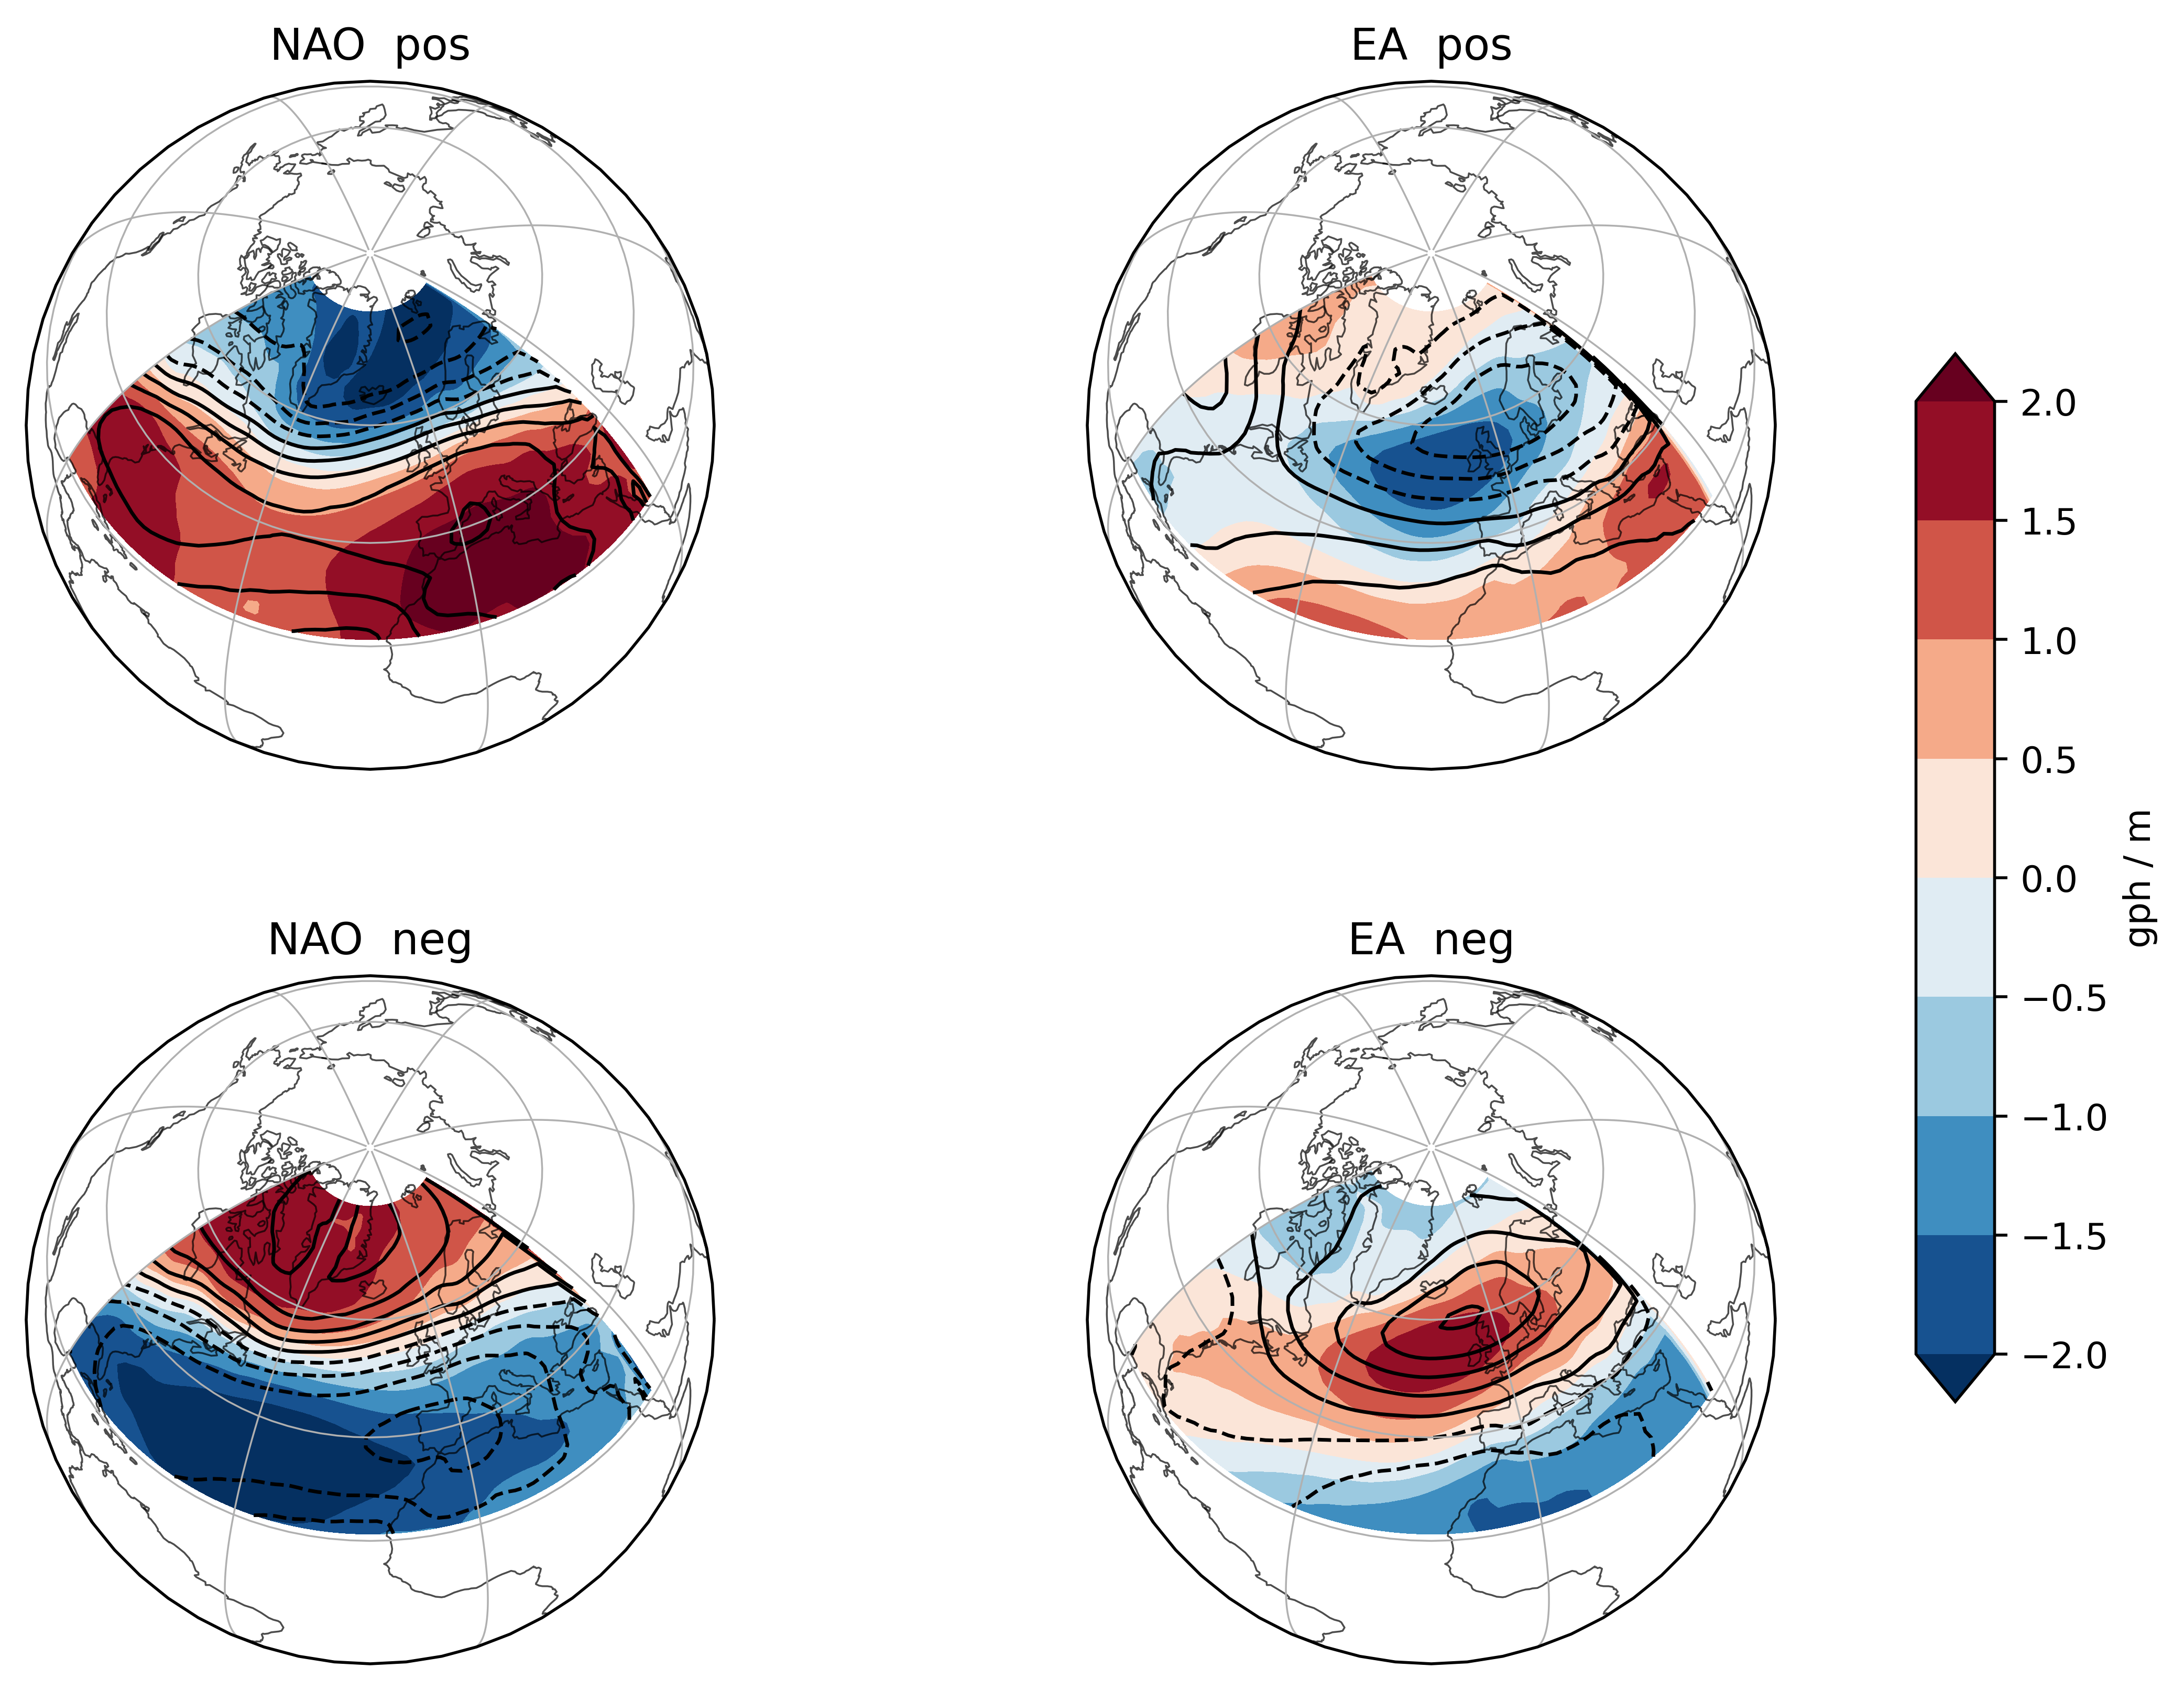

In [89]:
scpt.composite_gph(dep_mean_first,dep_mean_last)